# Statistical Analysis for Gene Expression profile for ADNI 

Using the file created in data_prep, Now let's run statistical significance test to identify " important genes"

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data_prep_path = '/Users/subashkhanal/Desktop/MLforAlzheimers/data/ADNI/genetics/data_prep'
stats_path = '/Users/subashkhanal/Desktop/MLforAlzheimers/data/ADNI/genetics/stats'
gene_expr_path = '/Users/subashkhanal/Desktop/MLforAlzheimers/data/ADNI/genetics/ADNI_Gene_Expression_Profile/'

In [28]:
df = pd.read_csv(os.path.join(data_prep_path,'ADNI_Imaging_Gene_Expression_MMSE_Combined.csv'),low_memory=False)

In [29]:
df = df.T

In [30]:
df.columns = df.iloc[0]
df = df.drop(df.index[0])

In [31]:
df_exp = df.loc[:,'11715100_at': 'AFFX-r2-TagQ-5_at'].astype('float')

In [34]:
df_exp = df_exp.drop('Gene')

In [7]:
df_MMSE = df.loc[:,['MMSE']]

In [8]:
from numpy import cov
df_exp_MMSE =pd.concat([df_exp, df_MMSE], axis=1)
#df_cov = df_exp_MMSE.cov()

In [9]:
#df_cov.shape

In [10]:
#df_cov.to_csv('gene_covarainces.csv')

In [11]:
df_exp_MMSE = df_exp_MMSE.dropna()

In [12]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

# Spearman correlation with MMSE

In [13]:
df_genes_corr = pd.DataFrame(data = list(df_exp.columns), columns=['gene_probes'])
df_genes_corr['cov'] = ''
df_genes_corr['pvalue'] = ''
df_genes_corr = df_genes_corr.set_index('gene_probes')

In [16]:
for col in df_exp.columns:
    data1 = df_exp_MMSE[col]
    data1 = np.array(data1, dtype=float)
    data2 = df_exp_MMSE['MMSE']
    data2 = np.array(data2, dtype=float)
    corr, p = spearmanr(data1, data2)
    df_genes_corr.at[col,'cov'] = corr
    df_genes_corr.at[col,'pvalue'] = p
    
df_genes_corr   

,cov,pvalue
gene_probes,,
11715100_at,0.0387475,0.295129
11715101_s_at,-0.0183457,0.620215
11715102_x_at,-0.0464924,0.208969
11715103_x_at,-0.00824049,0.823868
11715104_s_at,0.0421453,0.254778
...,...,...
AFFX-r2-TagJ-5_at,-0.0496384,0.179751
AFFX-r2-TagO-3_at,0.00726335,0.844469
AFFX-r2-TagO-5_at,-0.096448,0.0090257


In [17]:
df_genes_corr.to_csv(os.path.join(stats_path,'Spearmanr_with_MMSE.csv'))

# Pearson correlation with MMSE

In [18]:
for col in df_exp.columns:
    data1 = df_exp_MMSE[col]
    data1 = np.array(data1, dtype=float)
    data2 = df_exp_MMSE['MMSE']
    data2 = np.array(data2, dtype=float)
    corr, p = pearsonr(data1, data2)
    df_genes_corr.at[col,'cov'] = corr
    df_genes_corr.at[col,'pvalue'] = p
df_genes_corr

,cov,pvalue
gene_probes,,
11715100_at,-0.0292606,0.42925
11715101_s_at,-0.0531343,0.150965
11715102_x_at,-0.049596,0.180123
11715103_x_at,-0.0131455,0.722541
11715104_s_at,0.00686301,0.852941
...,...,...
AFFX-r2-TagJ-5_at,-0.0542216,0.142768
AFFX-r2-TagO-3_at,0.038009,0.304436
AFFX-r2-TagO-5_at,-0.0837489,0.0234527


In [20]:
df_genes_corr.to_csv(os.path.join(stats_path,'Pearsonr_with_MMSE.csv'))

# T-test

In [52]:
from collections import Counter
Counter(df['DX'])

Counter({nan: 1, 'CN': 244, 'Dementia': 113, 'MCI': 377, nan: 10})

In [8]:
df_CN = df[df['DX']=='CN']
df_AD = df[df['DX']=='Dementia']
df_MCI = df[df['DX']=='MCI']

In [9]:
len(df_CN),len(df_AD),len(df_MCI)

(244, 113, 377)

In [10]:
df_CN_exp = df_CN.loc[:,'11715100_at': 'AFFX-r2-TagQ-5_at'].astype('float')
df_AD_exp = df_AD.loc[:,'11715100_at': 'AFFX-r2-TagQ-5_at'].astype('float')
df_MCI_exp = df_MCI.loc[:,'11715100_at': 'AFFX-r2-TagQ-5_at'].astype('float')

In [46]:
data = df_CN_exp.loc[:,'11715100_at': 'AFFX-r2-TagQ-5_at'].astype('float')

In [48]:
stats.normaltest(data['11715100_at'])[1],stats.normaltest(data['11715100_at'])

(0.00033234996674650475,
 NormaltestResult(statistic=16.018644055064676, pvalue=0.00033234996674650475))

In [49]:
p = []
data = df_CN_exp
from scipy import stats
for col in data.columns:
    p.append(stats.normaltest(data[col])[1])
sum(p)/len(p)
# null hypothesis: x comes from a normal distribution

0.15998091462170227

In [50]:
p = []
data = df_AD_exp
from scipy import stats
for col in data.columns:
    p.append(stats.normaltest(data[col])[1])
sum(p)/len(p)
# null hypothesis: x comes from a normal distribution

0.2557328454985385

In [51]:
p = []
data = df_MCI_exp
from scipy import stats
for col in data.columns:
    p.append(stats.normaltest(data[col])[1])
sum(p)/len(p)
# null hypothesis: x comes from a normal distribution

0.11950402945686361

<ipython-input-28-c6bd244b9852>:4: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist, bins = np.histogram(data, bins=100, normed=True)


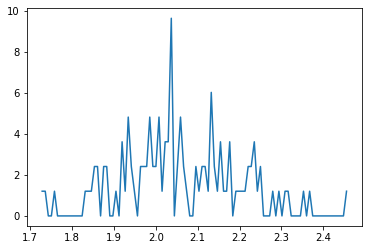

In [28]:
import matplotlib.pyplot as plt
import numpy as np
# a is your data array
hist, bins = np.histogram(data, bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

In [37]:
from scipy.stats import ttest_ind

In [38]:
#Assuming gene expression values are normally distributed let's run a student's t test between different groups


In [39]:
gene_probes = df_AD_exp.columns

In [40]:
groups = ['AD_CN', 'AD_MCI', 'CN_MCI']
df_p = pd.DataFrame(columns=groups, index = gene_probes) #datafrane for collecting p values for test

In [41]:
for gene in gene_probes:
    data1 = df_AD_exp[gene]
    data2 = df_CN_exp[gene]
    stat, p = ttest_ind(data1, data2)
    df_p.loc[gene,'AD_CN'] = p
    

In [42]:
for gene in gene_probes:
    data1 = df_AD_exp[gene]
    data2 = df_MCI_exp[gene]
    stat, p = ttest_ind(data1, data2)
    df_p.loc[gene,'AD_MCI'] = p

In [43]:
for gene in gene_probes:
    data1 = df_CN_exp[gene]
    data2 = df_MCI_exp[gene]
    stat, p = ttest_ind(data1, data2)
    df_p.loc[gene,'CN_MCI'] = p

Now since we have gene probes instead of gene names using the gene expression file create an additional column in df_p with respective gene name

In [53]:
gene_exp = pd.read_csv(os.path.join(gene_expr_path,'ADNI_Gene_Expression_Profile.csv'),low_memory=False)

In [54]:
gene_exp = gene_exp.drop(gene_exp.index[0:8])

In [55]:
for i in range(len(df_p)):
    gene = df_p.index[i]
    Locus = gene_exp[gene_exp.Phase == gene]['Unnamed: 1']
    Gene = gene_exp[gene_exp.Phase == gene]['Unnamed: 2']
    if len(Locus) != 0 and len(Gene) != 0:
        
        df_p.at[gene,'Gene'] = Gene.iloc[0]
        df_p.at[gene,'Locus'] = Locus.iloc[0]
    

In [57]:
df_p.to_csv(os.path.join(stats_path,'t_test_geneExpr.csv'))